In [141]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
#importing the dataset 
dataset=pd.read_csv('indian_liver_patient.csv')

In [144]:
#checking the head of our dataset
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [145]:
#checking the  info of the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [146]:
#Counting the ocurrence of values of Dataset column
dataset['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [147]:
#Converting the Binary value of the Dataset column i.e 1 and 2
#to 0 and 1 as our ANN model got confused and the loss function become negative
dataset.loc[dataset['Dataset']==1,'Dataset']=0
dataset.loc[dataset['Dataset']==2,'Dataset']=1
dataset['Dataset'].value_counts()


0    416
1    167
Name: Dataset, dtype: int64

In [148]:
#For visualising
import seaborn as sns

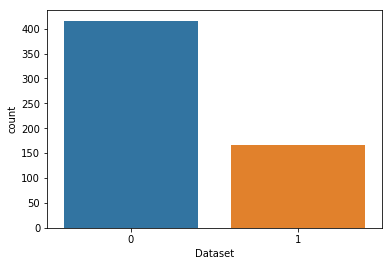

In [149]:
#Counting the number of occurence of the different values of the Dataset column
sns.countplot(dataset['Dataset'])

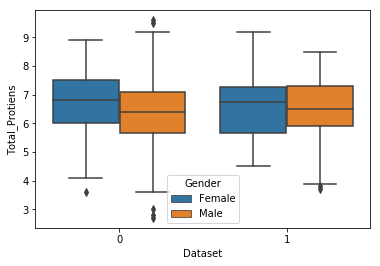

In [153]:
#Checking the Average of the total proteins vs the Whether the person is liver patient or not.
sns.boxplot(x='Dataset',y='Total_Protiens',hue='Gender',data=dataset)

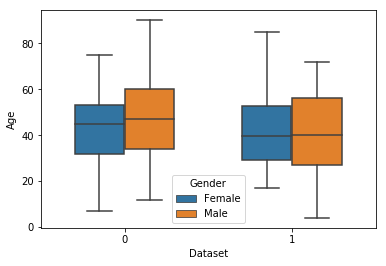

In [168]:
#Checking the Average of the Age vs the Whether the person is liver patient or not.
sns.boxplot(x='Dataset',y='Albumin',hue='Gender',data=dataset,width=0.6)

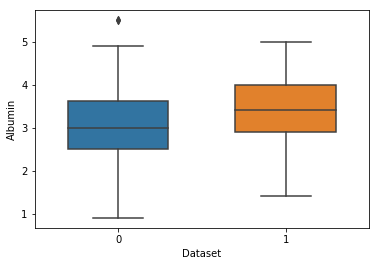

In [171]:
#Checking the Average of the Albumin vs the Whether the person is liver patient or not.
sns.boxplot(x='Dataset',y='Albumin',data=dataset,width=0.6)

In [172]:
#Converting the Categorical features

In [173]:
new_Data=pd.get_dummies(dataset,columns=['Gender'],drop_first=True)

In [174]:
new_Data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [175]:
new_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
Gender_Male                   583 non-null uint8
dtypes: float64(5), int64(5), uint8(1)
memory usage: 46.2 KB


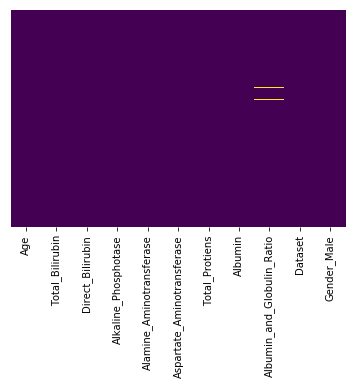

In [176]:
#Checking for null data
sns.heatmap(new_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [177]:
#converting the null value into mean value
def Converter(data):
    if pd.isnull(data):
        return new_Data['Albumin_and_Globulin_Ratio'].mean()
    else:
        return data 
        

In [178]:
#Applying the Function to column of the dataset that have null values
new_Data['Albumin_and_Globulin_Ratio']=new_Data['Albumin_and_Globulin_Ratio'].apply(Converter)

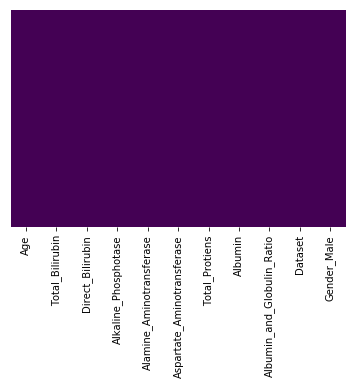

In [179]:
#Rechecking for null value
sns.heatmap(new_Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [180]:
#Converting the dataset into x and y(target variable)
X=new_Data.drop('Dataset',axis=1)
y=new_Data['Dataset']

In [181]:
#Dividing the data into training and test set
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
#feature scaling

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
scaler=StandardScaler()

In [188]:
X_train=scaler.fit_transform(X_train)

In [189]:
X_test=scaler.transform(X_test)

In [190]:
import keras


In [191]:
#importing the libraries for our ANN Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [192]:
#Initialising the model
model=Sequential()

In [193]:
#adding the first layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10))
model.add(Dropout(2))

In [194]:
#new_Data.info()
#adding the second layer
model.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(2))

In [195]:
#adding the output layer
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.add(Dropout(2))

In [196]:
#compiling all the layer together
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [198]:
#Fitting the data to our model
model.fit(X_train,y_train,batch_size=20,epochs=400)

Epoch 1/400
466/466 [==============================] - 0s 81us/step - loss: 0.5028 - acc: 0.7296
Epoch 2/400
466/466 [==============================] - 0s 103us/step - loss: 0.5023 - acc: 0.7318
Epoch 3/400
466/466 [==============================] - 0s 120us/step - loss: 0.5021 - acc: 0.7253
Epoch 4/400
466/466 [==============================] - 0s 150us/step - loss: 0.5019 - acc: 0.7361
Epoch 5/400
466/466 [==============================] - 0s 135us/step - loss: 0.5022 - acc: 0.7296
Epoch 6/400
466/466 [==============================] - 0s 109us/step - loss: 0.5023 - acc: 0.7253
Epoch 7/400
466/466 [==============================] - 0s 131us/step - loss: 0.5021 - acc: 0.7124
Epoch 8/400
466/466 [==============================] - 0s 120us/step - loss: 0.5022 - acc: 0.7124
Epoch 9/400
466/466 [==============================] - 0s 139us/step - loss: 0.5020 - acc: 0.7210
Epoch 10/400
466/466 [==============================] - 0s 112us/step - loss: 0.5023 - acc: 0.7189
Epoch 11/400
466/466

466/466 [==============================] - 0s 183us/step - loss: 0.4983 - acc: 0.7189
Epoch 84/400
466/466 [==============================] - 0s 163us/step - loss: 0.4989 - acc: 0.7189
Epoch 85/400
466/466 [==============================] - 0s 93us/step - loss: 0.4978 - acc: 0.7232
Epoch 86/400
466/466 [==============================] - 0s 92us/step - loss: 0.4978 - acc: 0.7210
Epoch 87/400
466/466 [==============================] - 0s 108us/step - loss: 0.4977 - acc: 0.7253
Epoch 88/400
466/466 [==============================] - 0s 93us/step - loss: 0.4981 - acc: 0.7296
Epoch 89/400
466/466 [==============================] - 0s 95us/step - loss: 0.4977 - acc: 0.7232
Epoch 90/400
466/466 [==============================] - 0s 112us/step - loss: 0.4978 - acc: 0.7253
Epoch 91/400
466/466 [==============================] - 0s 105us/step - loss: 0.4978 - acc: 0.7296
Epoch 92/400
466/466 [==============================] - 0s 117us/step - loss: 0.4976 - acc: 0.7275
Epoch 93/400
466/466 [=====

466/466 [==============================] - 0s 142us/step - loss: 0.4936 - acc: 0.7339
Epoch 165/400
466/466 [==============================] - 0s 112us/step - loss: 0.4940 - acc: 0.7361
Epoch 166/400
466/466 [==============================] - 0s 118us/step - loss: 0.4938 - acc: 0.7361
Epoch 167/400
466/466 [==============================] - 0s 99us/step - loss: 0.4933 - acc: 0.7446
Epoch 168/400
466/466 [==============================] - 0s 101us/step - loss: 0.4938 - acc: 0.7339
Epoch 169/400
466/466 [==============================] - 0s 101us/step - loss: 0.4941 - acc: 0.7318
Epoch 170/400
466/466 [==============================] - 0s 97us/step - loss: 0.4938 - acc: 0.7296
Epoch 171/400
466/466 [==============================] - 0s 84us/step - loss: 0.4937 - acc: 0.7318
Epoch 172/400
466/466 [==============================] - 0s 86us/step - loss: 0.4934 - acc: 0.7318
Epoch 173/400
466/466 [==============================] - 0s 103us/step - loss: 0.4948 - acc: 0.7382
Epoch 174/400
466/

466/466 [==============================] - 0s 77us/step - loss: 0.4912 - acc: 0.7296
Epoch 247/400
466/466 [==============================] - 0s 77us/step - loss: 0.4912 - acc: 0.7318
Epoch 248/400
466/466 [==============================] - 0s 73us/step - loss: 0.4911 - acc: 0.7318
Epoch 249/400
466/466 [==============================] - 0s 75us/step - loss: 0.4907 - acc: 0.7253
Epoch 250/400
466/466 [==============================] - 0s 71us/step - loss: 0.4905 - acc: 0.7253
Epoch 251/400
466/466 [==============================] - 0s 94us/step - loss: 0.4912 - acc: 0.7275
Epoch 252/400
466/466 [==============================] - 0s 88us/step - loss: 0.4907 - acc: 0.7296
Epoch 253/400
466/466 [==============================] - 0s 94us/step - loss: 0.4905 - acc: 0.7253
Epoch 254/400
466/466 [==============================] - 0s 92us/step - loss: 0.4905 - acc: 0.7253
Epoch 255/400
466/466 [==============================] - 0s 92us/step - loss: 0.4904 - acc: 0.7318
Epoch 256/400
466/466 [=

466/466 [==============================] - 0s 97us/step - loss: 0.4892 - acc: 0.7296
Epoch 328/400
466/466 [==============================] - 0s 103us/step - loss: 0.4888 - acc: 0.7275
Epoch 329/400
466/466 [==============================] - 0s 103us/step - loss: 0.4888 - acc: 0.7296
Epoch 330/400
466/466 [==============================] - 0s 90us/step - loss: 0.4882 - acc: 0.7275
Epoch 331/400
466/466 [==============================] - 0s 84us/step - loss: 0.4884 - acc: 0.7253
Epoch 332/400
466/466 [==============================] - 0s 90us/step - loss: 0.4883 - acc: 0.7318
Epoch 333/400
466/466 [==============================] - 0s 92us/step - loss: 0.4883 - acc: 0.7318
Epoch 334/400
466/466 [==============================] - 0s 86us/step - loss: 0.4883 - acc: 0.7318
Epoch 335/400
466/466 [==============================] - 0s 137us/step - loss: 0.4879 - acc: 0.7318
Epoch 336/400
466/466 [==============================] - 0s 109us/step - loss: 0.4883 - acc: 0.7339
Epoch 337/400
466/46

In [203]:
#Making Prediction from our model
predictions=model.predict(X_test)

In [206]:
#converting the probablitiy obtained using the predict method to the binary output 
predictions=(predictions>0.5)


In [207]:
#Importing the library and Evaluating the performance of our ANN Model on the test set
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [208]:
print('Confusion Matrix \n',confusion_matrix(y_test,predictions))

Confusion Matrix 
 [[80 10]
 [15 12]]


In [209]:
#Printing the Classifcation Report
print('Classification Report \n',classification_report(y_test,predictions))

Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        90
           1       0.55      0.44      0.49        27

   micro avg       0.79      0.79      0.79       117
   macro avg       0.69      0.67      0.68       117
weighted avg       0.77      0.79      0.78       117



In [210]:
#Printing the Classifcation Report
print('Accuracy of our mode when applied on test set-',accuracy_score(y_test,predictions))

Accuracy of our mode when applied on test set- 0.7863247863247863
